In [1]:
#Documentation

In [2]:
#!pip install opencv-python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import imghdr

In [4]:
os.getcwd()

'C:\\Users\\ragha\\Documents\\Python Scripts\\Projects'

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization,MaxPooling2D, Input
from tensorflow.keras.models import Sequential

In [6]:
image_exts=['jpeg','jpg','bmp','png']
data=r'C:\Users\ragha\Documents\Python Scripts\files\People'

In [7]:
data_dir=r'C:\Users\ragha\Documents\Python Scripts\files\People'

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image C:\Users\ragha\Documents\Python Scripts\files\People\logs\train
Issue with image C:\Users\ragha\Documents\Python Scripts\files\People\logs\validation


In [9]:
data = tf.keras.utils.image_dataset_from_directory(data)

Found 797 files belonging to 3 classes.


In [10]:
data_iterator=data.as_numpy_iterator()

In [11]:
batch=data_iterator.next()

In [12]:
len(batch) #images,labels

2

In [13]:
batch[0].shape #32 images

(32, 256, 256, 3)

In [14]:
batch[1].shape

(32,)

In [15]:
batch[1] # labels

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

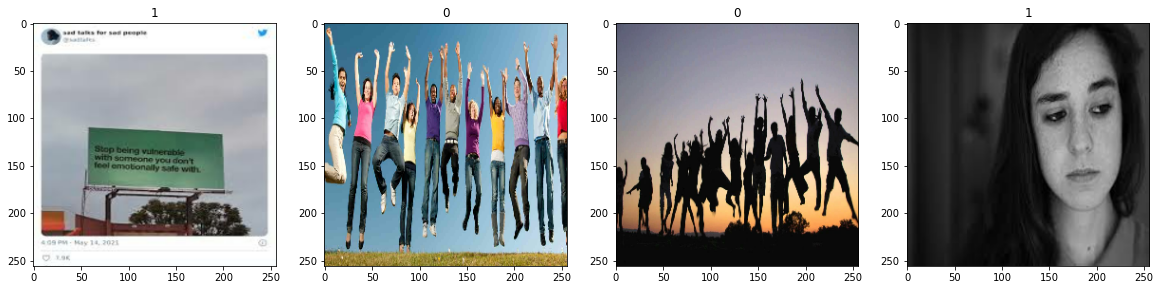

In [16]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
# Class 1 : Sad people
# Class 0 : Happy people

In [18]:
data=data.map(lambda x,y:(x/255,y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[1.56862754e-02, 3.13725509e-02, 4.31372561e-02],
          [1.66743267e-02, 3.23606022e-02, 4.41253074e-02],
          [1.96078438e-02, 3.52941193e-02, 4.70588244e-02],
          ...,
          [4.50980395e-01, 2.31372550e-01, 0.00000000e+00],
          [4.42179829e-01, 2.34306067e-01, 5.86703420e-03],
          [4.21254605e-01, 2.35294119e-01, 1.50275733e-02]],
 
         [[1.56862754e-02, 3.13725509e-02, 4.31372561e-02],
          [1.66743267e-02, 3.23606022e-02, 4.41253074e-02],
          [1.96078438e-02, 3.52941193e-02, 4.70588244e-02],
          ...,
          [4.51778024e-01, 2.32170194e-01, 0.00000000e+00],
          [4.42179829e-01, 2.34306067e-01, 5.86703420e-03],
          [4.22994584e-01, 2.37034097e-01, 1.67675540e-02]],
 
         [[1.56862754e-02, 3.13725509e-02, 4.31372561e-02],
          [1.66743267e-02, 3.23606022e-02, 4.41253074e-02],
          [1.96078438e-02, 3.52941193e-02, 4.70588244e-02],
          ...,
          [4.53178614e-01, 2.33570769e-01, 3.1989

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [21]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [22]:
model=Sequential()
model.add(Conv2D(16,(3,3),1,activation='elu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),1,activation='elu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(16,(3,3),1,activation='elu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='elu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                        

In [25]:
logdir=r'C:\Users\ragha\Documents\Python Scripts\files\People\logs'

In [26]:
tensorboard_callbacks=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist=model.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callbacks])

Epoch 1/10
17/17 [==============================] - 9s 473ms/step - loss: 4.4584 - accuracy: 0.6912 - val_loss: 0.7161 - val_accuracy: 0.7250
Epoch 2/10
17/17 [==============================] - 8s 463ms/step - loss: 1.1948 - accuracy: 0.8640 - val_loss: 0.6855 - val_accuracy: 0.8062
Epoch 3/10
17/17 [==============================] - 8s 456ms/step - loss: 0.5250 - accuracy: 0.9007 - val_loss: 0.4306 - val_accuracy: 0.8438
Epoch 4/10
17/17 [==============================] - 8s 459ms/step - loss: 0.6402 - accuracy: 0.8952 - val_loss: 2.9690 - val_accuracy: 0.6438
Epoch 5/10
17/17 [==============================] - 8s 458ms/step - loss: 0.4004 - accuracy: 0.9301 - val_loss: 1.5850 - val_accuracy: 0.6687
Epoch 6/10
17/17 [==============================] - 8s 455ms/step - loss: 0.2377 - accuracy: 0.9596 - val_loss: 4.8869 - val_accuracy: 0.5875
Epoch 7/10
17/17 [==============================] - 8s 465ms/step - loss: 0.0760 - accuracy: 0.9779 - val_loss: 2.0254 - val_accuracy: 0.7188
Epoch 

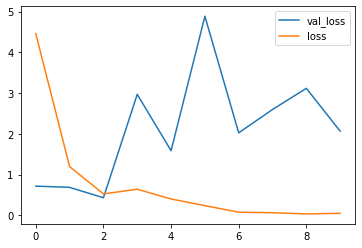

In [28]:
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['loss'], label='loss')
plt.legend()

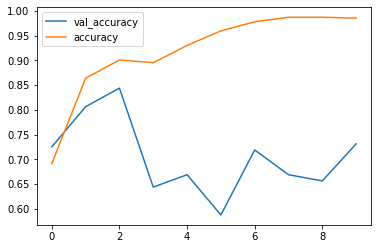

In [29]:
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.legend()

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 129ms/step


In [34]:
print(f'Precision:{pre.result()}, Recall:{re.result()},Accuracy: {acc.result()}')

Precision:0.6235294342041016, Recall:1.0,Accuracy: 0.6559139490127563


In [35]:
from tensorflow.keras.models import load_model

In [36]:
model.save(os.path.join('models','imageclassifier.h5'))